# Visualisas dan Clustering Cuaca di Amerika Serikat pada tahun 2016-2019

10121047 - Muhammad Hasan (Kontribusi)

10121053 - Razran Haidira Priatama (Tidak Kontribusi)

10121054 - Fayyad Azka Muhammad (Kontribusi)

10121056 - Muhammad Yazid Farhan (Kontribusi)

10121067 - Syahmar Chairiza Idrus (Tidak Kontriusi)

10121071 - Ricky Nugraha (Tidak Kontribusi)

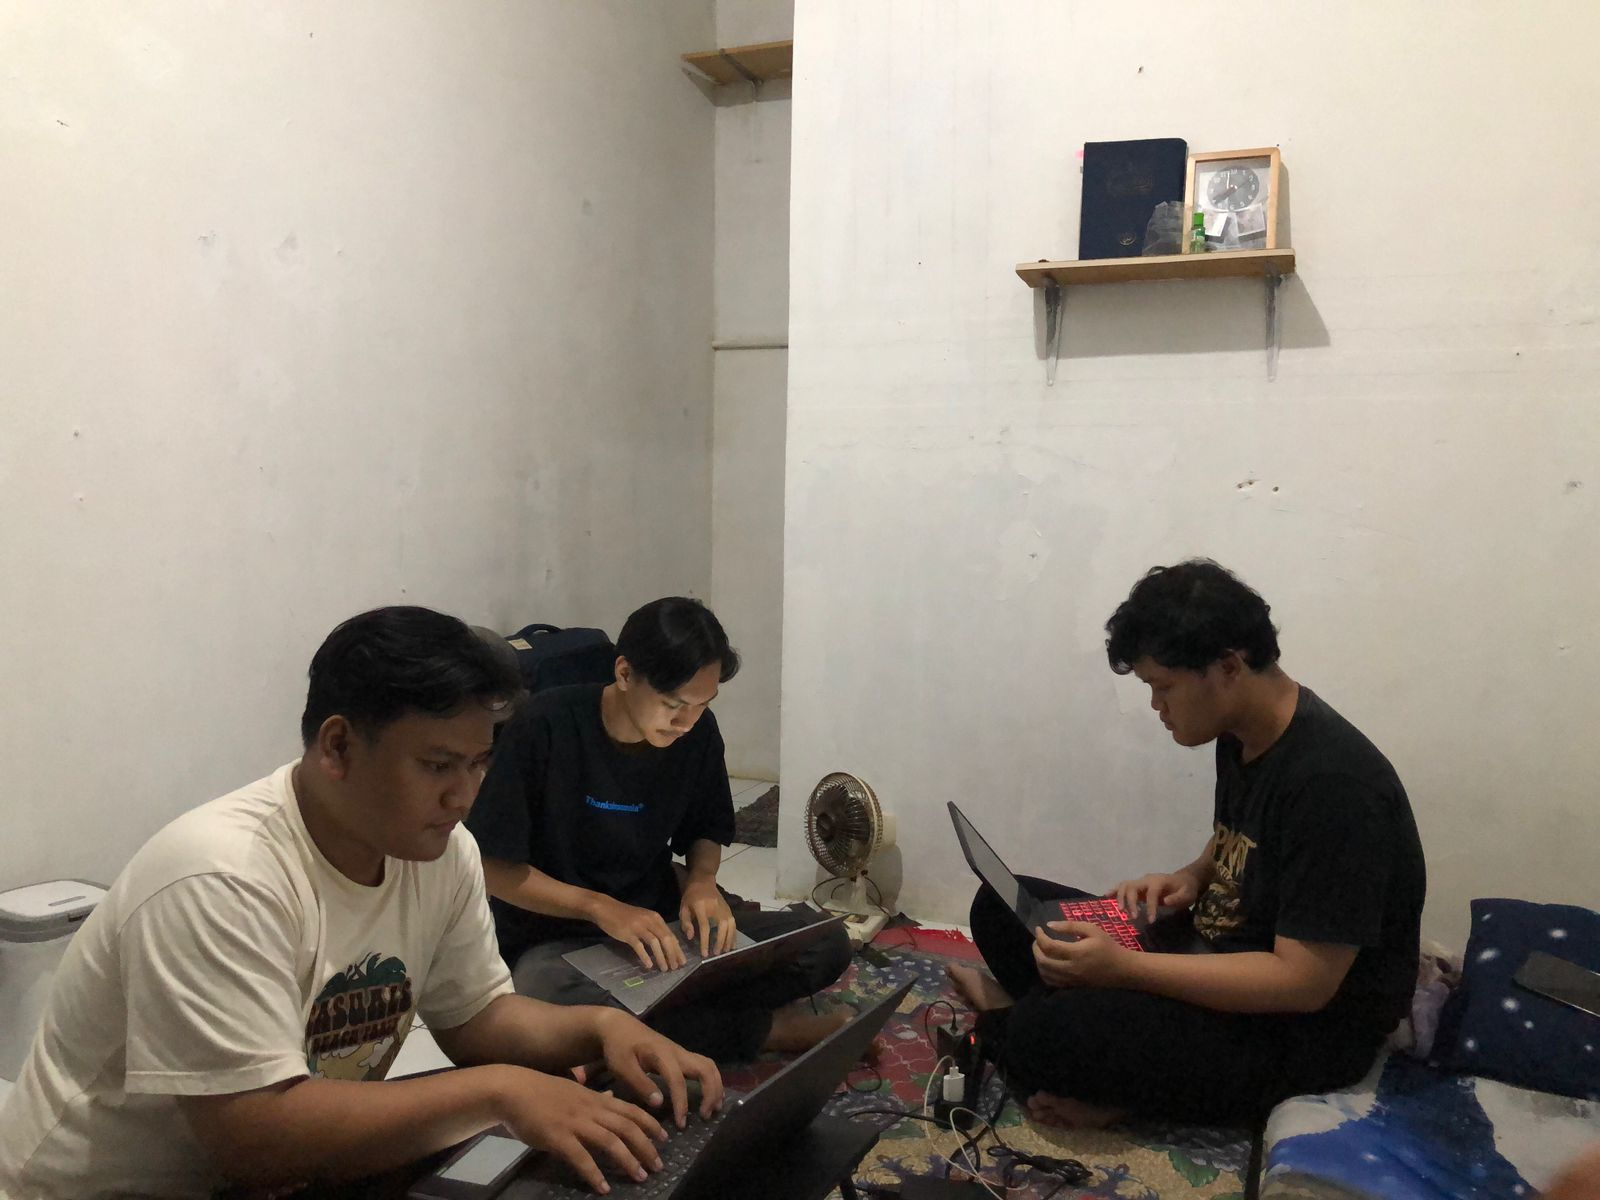

In [47]:
from IPython.display import Image
Image(filename='1.jpeg', width=400, height=400)

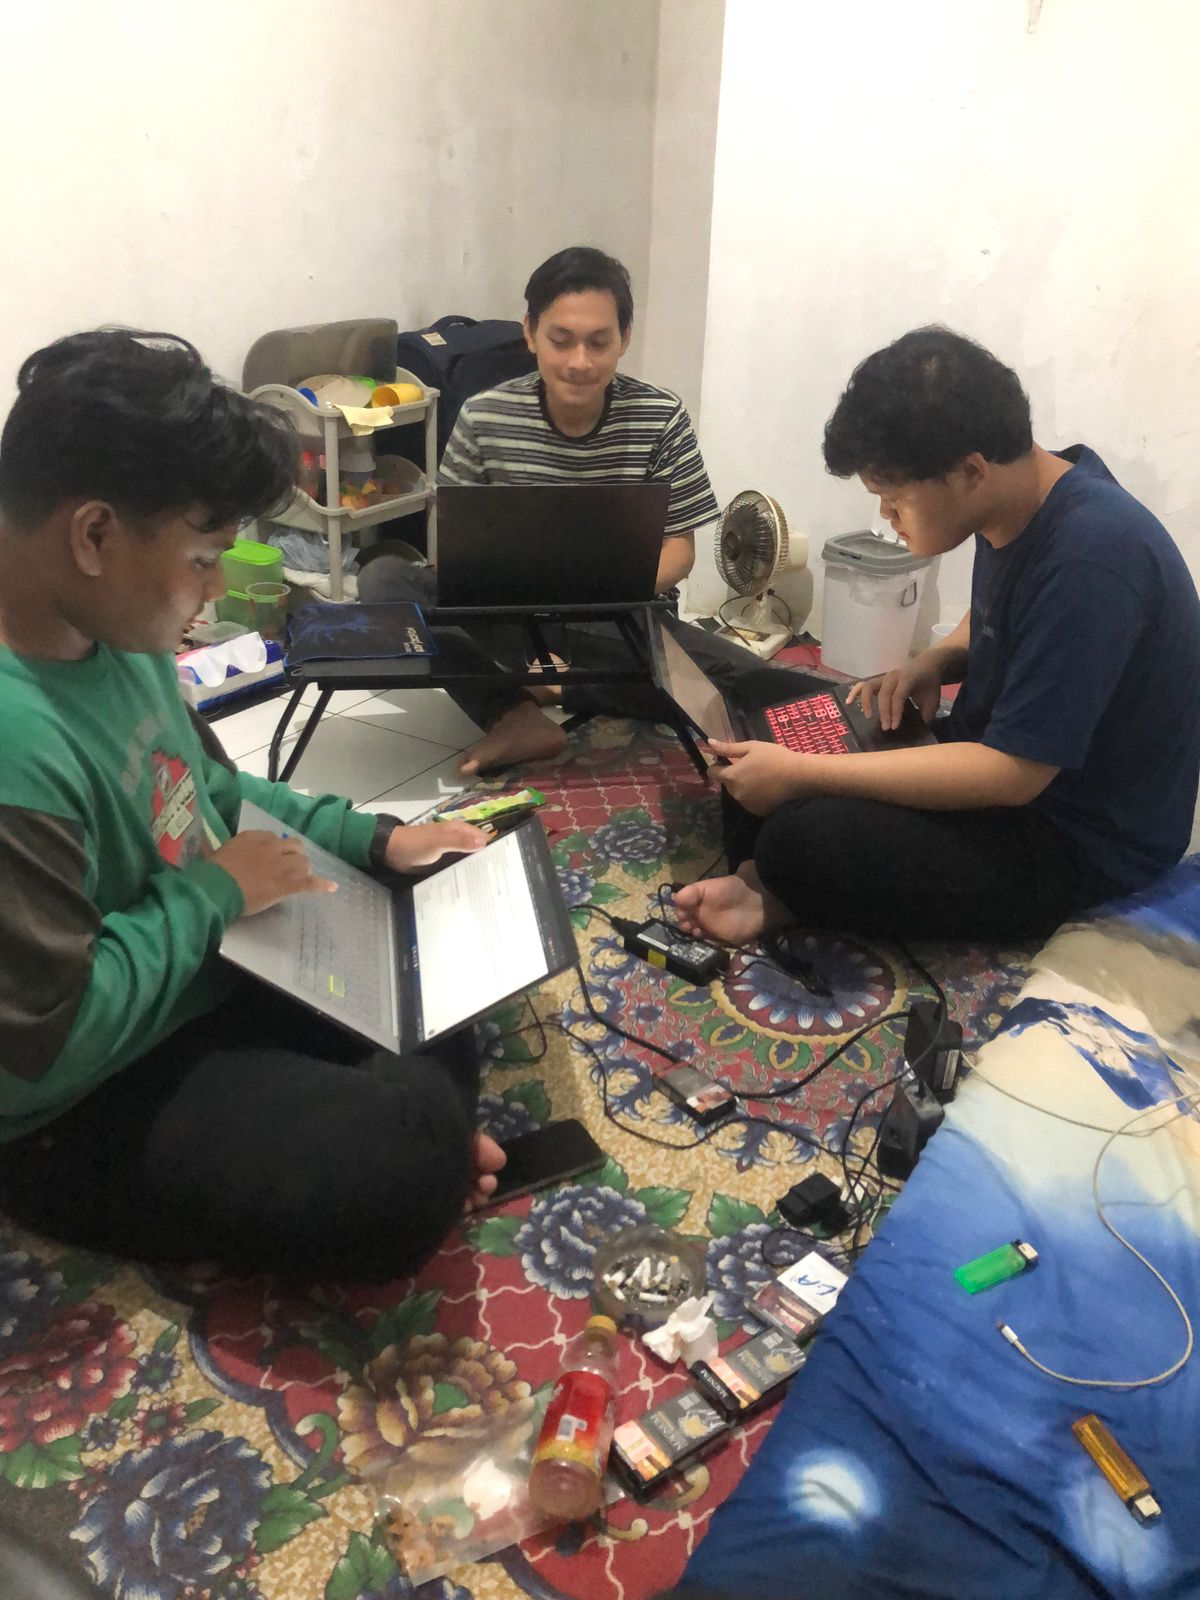

In [48]:
from IPython.display import Image
Image(filename='2.jpeg', width=400, height=400)

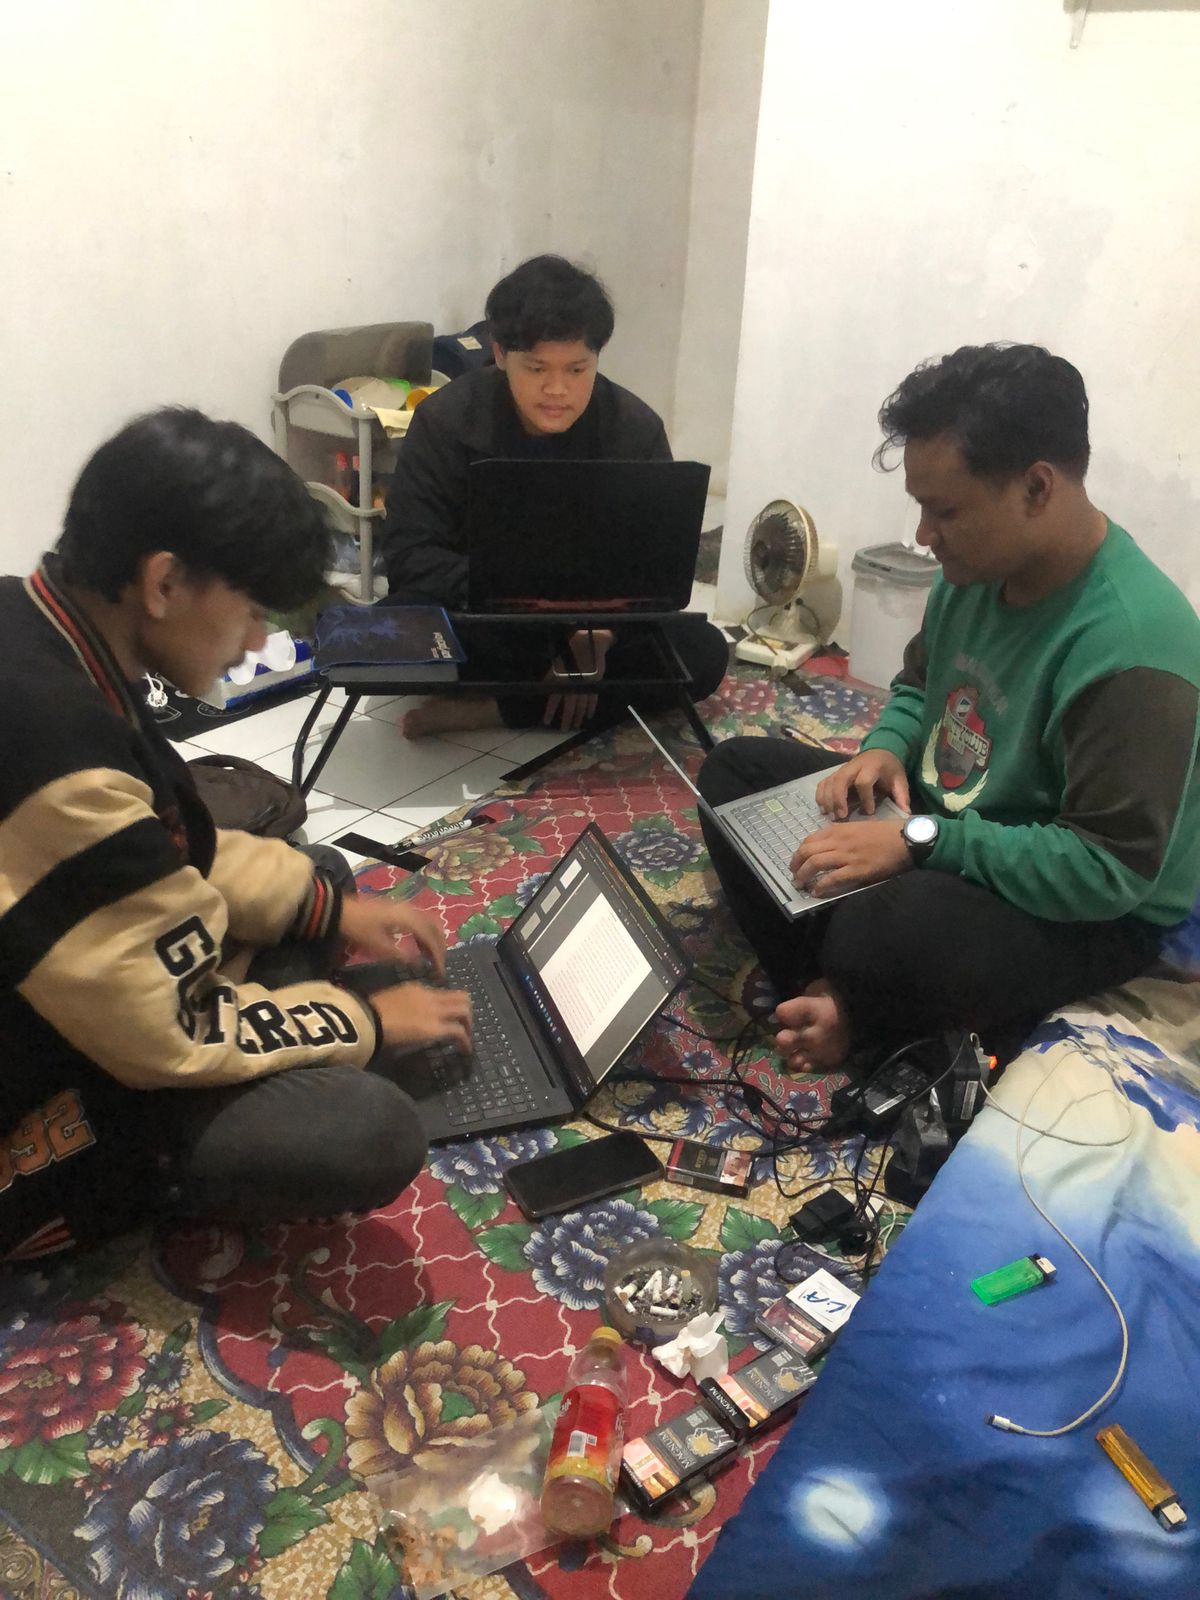

In [49]:
from IPython.display import Image
Image(filename='3.jpeg', width=400, height=400)

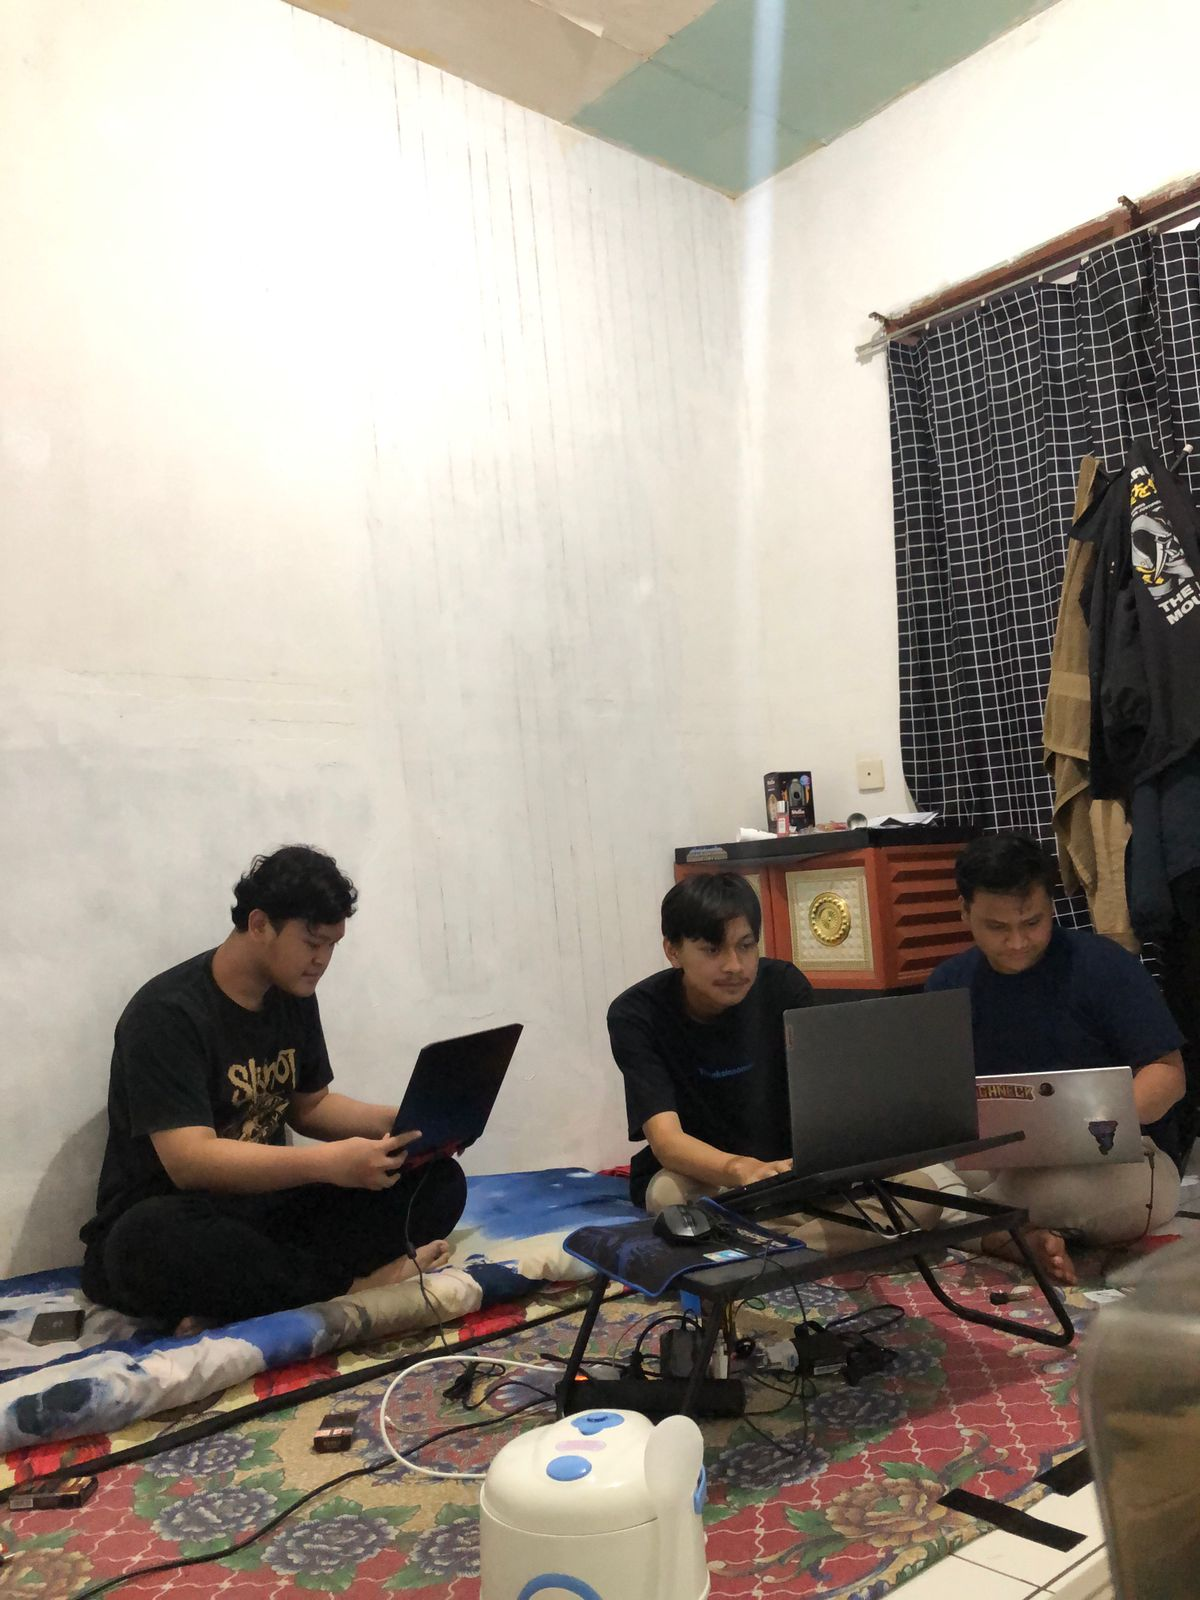

In [50]:
from IPython.display import Image
Image(filename='4.jpeg', width=400, height=400)

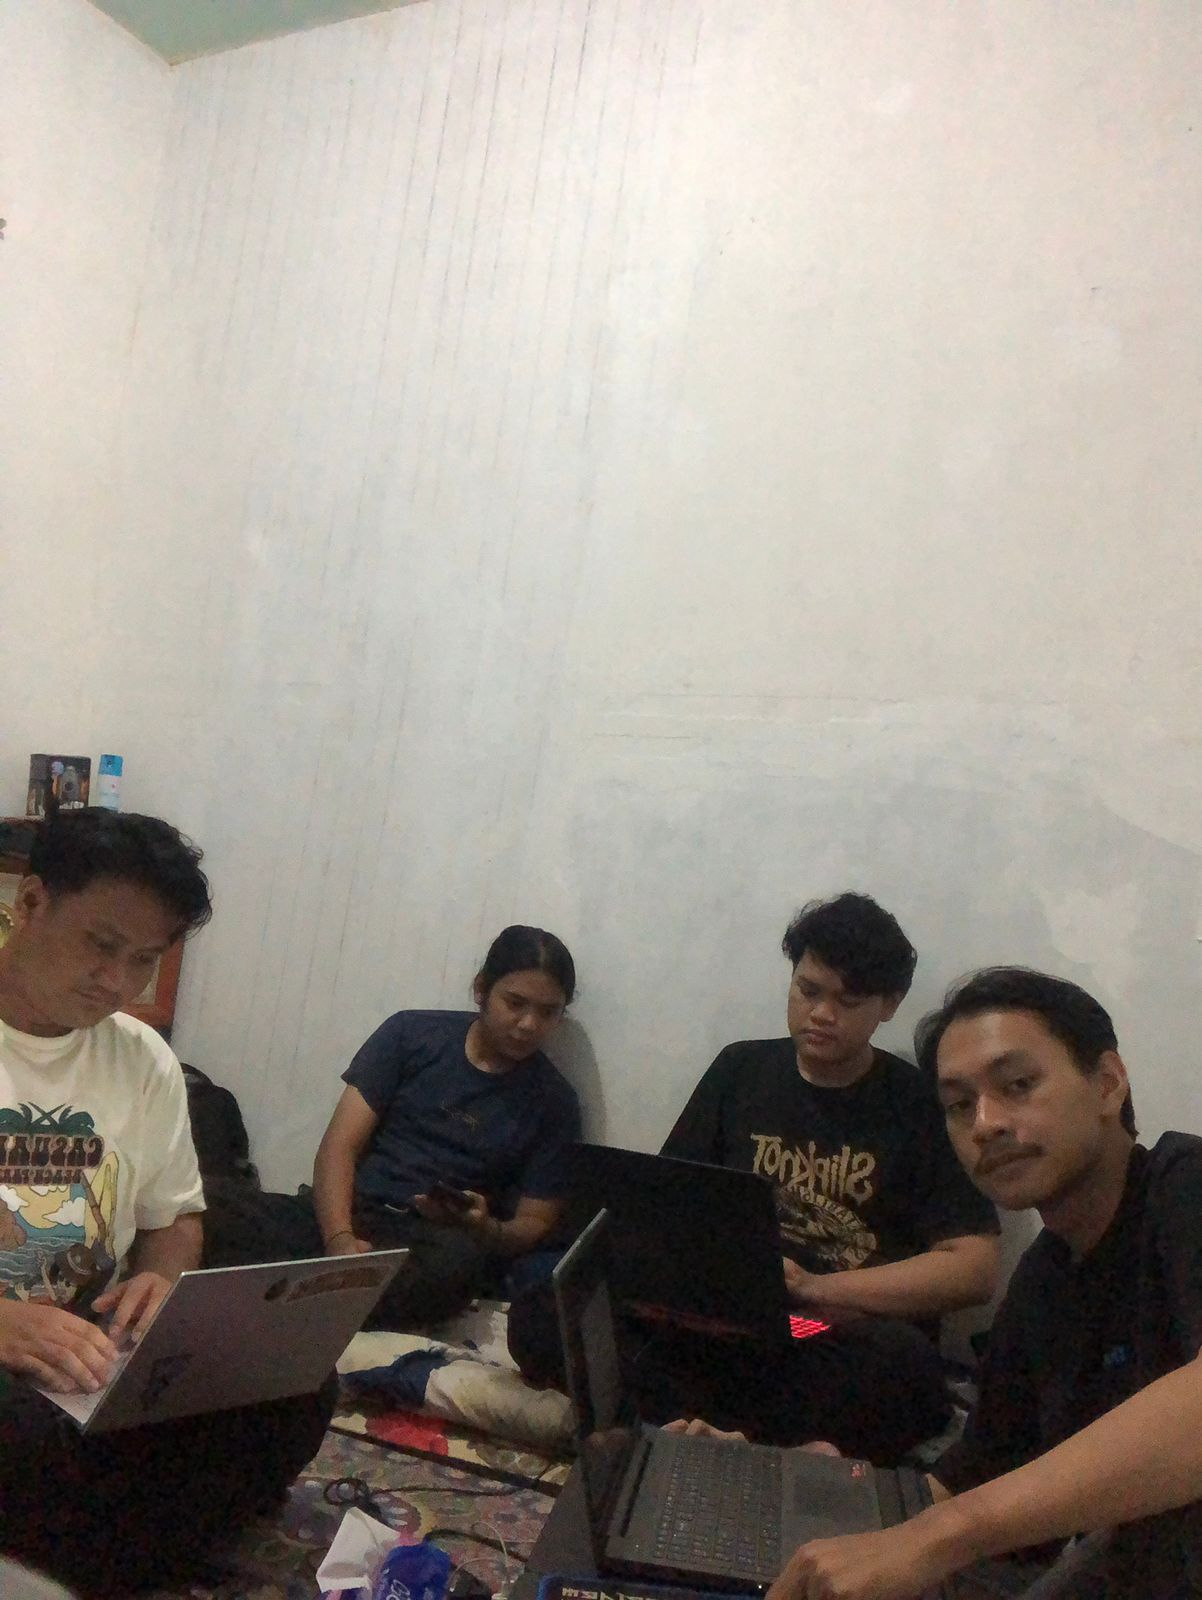

In [53]:
from IPython.display import Image
Image(filename='5.jpeg', width=400, height=400)

# Latar Belakang

Cuaca merupakan salah satu hal yang sangat berpengaruh kepada
kehidupan makhluk hidup. Perubahan cuaca yang tidak menentu terdapat di
beberapa daerah di Indonesia. Namun dengan seiring perkembangan jaman,
kemajuan ilmu pengetahuan dan teknologi dapat dilakukan pendekatan guna
memprediksi perubahan cuaca yang terjadi.

National Hurricane Center (NHC) atau Pusat Badai Nasional merupakan
suatu lembaga resmi dari pemerintah yang bertugas sebagai layanan informasi
untuk memonitor keadaan perubahan cuaca di Amerika Serikat. NHC bekerja sama
dengan beberapa stasiun pemantau cuaca di seluruh Amerika Serikat dan meneruskan
info tentang perubahan cuaca atau iklim yang terjadi ke masyarakan lewat
beberapa media. Namun info yang diberikan hanya prediksi perubahan cuaca dan
info secara keseluruhan, bukan terletak pada satu titik daerah tertentu.

Salah satu fenomena alam yang kita rasakan sehari-hari mengenai
dinamika cuaca, seperti suhu, cahaya, polusi (carbon monoksida/CO) dan curah
hujan. Sering kali kita merasakan perubahan kondisi atmosfer dalam periode yang
cepat. Sebagai contoh, kondisi udara pagi sampai siang hari udara cerah, tiba-tiba
menjelang sore udara berawan dan terjadi hujan dengan intensitas lebat.

Maka berdasarkan pemikiran diatas, kami bermaksud untuk mengangkat Tema "Visualisasi dan Clustering Cuaca di Amerika Serikat pada tahun 2021". Dimana dengan ini kami akan menampilkan sebuah informasi tentang cuaca di negara Amerika Serikat menggunakan sebuah visualisasi yang mudah untuk di cerna oleh kalangan masyarakat umum.

Dengan memanfaatkan internet, informasi tentang cuaca di Amerika Serikat akan tersampaikan secara real time Sehingga pengguna dapat mengetahui keadaan cuaca di suatu daerah tertentu tanpa perlu datang ke daerah
tersebut.

# Tujuan

1. menampilkan informasi tentang cuaca di negara Amerika Serikat dengan visualisasi yang mudah dicerna oleh pengguna

2. Data yang sudah dikumpulkan selama beberapa tahun dapat dilakukan pengamatan mengenai perubahan perilaku iklim dan atmosfer

# Library

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import folium

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from hmmlearn import hmm

# Load Dataset

ini adalah kumpulan data peristiwa cuaca nasional, yang mencakup 49 negara bagian Amerika Serikat. Contoh kejadian cuaca adalah hujan, salju, badai, dan kondisi beku. Data dikumpulkan dari Januari 2021 hingga Desember 2021, menggunakan laporan cuaca historis yang ada untuk stasiun cuaca berbasis bandara di seluruh negeri.

Peristiwa cuaca merupakan entitas spatiotemporal, dimana entitas tersebut dikaitkan dengan lokasi dan waktu. Berikut adalah deskripsi jenis kejadian cuaca yang tersedia dalam dataset ini: Dingin: Kasus memiliki suhu yang sangat rendah, dengan suhu di bawah -23,7 derajat Celcius.

Kabut: Kasus dimana terdapat kondisi jarak pandang yang rendah akibat kabut atau kabut.

Hujan Es: Kasus memiliki presipitasi padat termasuk pelet es dan hujan es.

Hujan: Kasus hujan, mulai dari ringan hingga lebat.

Salju: Kasus salju, mulai dari ringan hingga berat.

Badai: Kondisi sangat berangin, dengan kecepatan angin minimal 60 km/jam.

Curah Hujan Lainnya: Jenis curah hujan lain yang tidak dapat ditetapkan ke jenis peristiwa yang dijelaskan sebelumnya.

In [54]:
df = pd.read_csv('WeatherEvents_Jan2016-Dec2019.csv')
df.tail(3)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
662665,W-1062597,Fog,Severe,2021-12-29 23:35:00,2021-12-30 16:35:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0
662666,W-1062598,Fog,Moderate,2021-12-30 17:15:00,2021-12-30 17:35:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0
662667,W-1062599,Fog,Severe,2021-12-31 10:55:00,2021-12-31 12:55:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0


# Data Cleaning

Dalam proyek ini, durasi setiap peristiwa cuaca adalah fitur utama yang digunakan untuk mengelompokkan wilayah. Itu dihitung dengan menggunakan waktu akhir acara dikurangi waktu mulai, setiap acara tunggal yang berlangsung lebih dari 30 hari pada awalnya dihilangkan, kemudian acara apa pun di luar tiga standar deviasi dari rata-rata juga dihapus.

In [16]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
df['End']=pd.to_datetime(df['EndTime(UTC)'], format=datetimeFormat)
df['Start']=pd.to_datetime(df['StartTime(UTC)'], format=datetimeFormat)
df['Duration']=df['End']-df['Start']
df['Duration'] = df['Duration'].dt.total_seconds()
df['Duration'] = df['Duration']/(60*60) #in hours
df = df[(df['Duration']< 30*24) & (df['Duration'] != 0)] #remove obvious wrong data
df.tail(3)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,End,Start,Duration
662665,W-1062597,Fog,Severe,2021-12-29 23:35:00,2021-12-30 16:35:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0,2021-12-30 16:35:00,2021-12-29 23:35:00,17.000000
662666,W-1062598,Fog,Moderate,2021-12-30 17:15:00,2021-12-30 17:35:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0,2021-12-30 17:35:00,2021-12-30 17:15:00,0.333333
662667,W-1062599,Fog,Severe,2021-12-31 10:55:00,2021-12-31 12:55:00,0.0,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0,2021-12-31 12:55:00,2021-12-31 10:55:00,2.000000


# Check events distribution

In [17]:
print("Overall Duration Summary")
print("--Count", df['Duration'].size)
print("--%miss.", sum(df['Duration'].isnull()))
print("--card.",df['Duration'].unique().size)
print("--min",df['Duration'].min())
print("--lowerBoundary.",df['Duration'].median()-1.5*((df['Duration'].quantile(0.75))-df['Duration'].quantile(0.25)))
print("--1stQrt",df['Duration'].quantile(0.25))
print("--mean",df['Duration'].mean())
print("--median",df['Duration'].median())
print("--3rdQrt",df['Duration'].quantile(0.75))
print("--upperBoundary.",df['Duration'].median()+1.5*((df['Duration'].quantile(0.75))-df['Duration'].quantile(0.25)))
print("--95%Boundary.",df['Duration'].mean()+1.96*df['Duration'].std())
print("--max",df['Duration'].max())
print("--Std.Dev",df['Duration'].std())

Overall Duration Summary
--Count 662637
--%miss. 0
--card. 1719
--min 0.016666666666666666
--lowerBoundary. -0.7583333333333336
--1stQrt 0.3333333333333333
--mean 1.3217111580951058
--median 0.6666666666666666
--3rdQrt 1.2833333333333334
--upperBoundary. 2.091666666666667
--95%Boundary. 10.304555644036299
--max 704.0
--Std.Dev 4.583083921398568


In [18]:
df = df[(df['Duration']< 10)]
df['Duration'].size

655561

# Data Normalization

normalisasi data untuk perbandingan yang lebih baik dari setiap peristiwa cuaca, semua durasi waktu mereka dinormalisasi ke kisaran 0 hingga 100, nol berarti peristiwa itu tidak pernah terjadi dalam setahun dan 100 berarti peristiwa itu terjadi sepanjang waktu sepanjang tahun.

In [21]:
df2 = df.groupby(['AirportCode','City','State', 
                  'LocationLat', 'LocationLng','Type']).agg({'Duration':['sum']}).reset_index()
df2.columns=pd.MultiIndex.from_tuples((("AirportCode", " "),("City", " "),
                                       ("State", " "), ("LocationLat", " "),
                                       ("LocationLng", " "), ("Type", " "), ("Duration", " ")))
df2.columns = df2.columns.get_level_values(0)
df2['Duration'] = df2['Duration']/(24*4*3.65) #yearly percentage  
df2 = df2.sort_values(by='Duration')
df2.tail(3)

,AirportCode,City,State,LocationLat,LocationLng,Type,Duration
1535,KTTD,Troutdale,OR,45.5511,-122.4089,Rain,9.422041
402,KCNO,Ontario,CA,33.9753,-117.6361,Fog,9.423754
686,KGRF,Tacoma,WA,47.0792,-122.5808,Rain,9.861587


In [22]:
df_flat = df2.pivot(index='AirportCode', columns='Type', values=['Duration']).reset_index().fillna(0)
df_flat.columns=pd.MultiIndex.from_tuples(((' ', 'AirportCode'),(' ', 'Cold'),(' ', 'Fog'),
            (' ',  'Hail'),(' ', 'Precipitation'),(' ', 'Rain'),(' ', 'Snow'),(' ', 'Storm')))
df_flat.columns = df_flat.columns.get_level_values(1)
#df_flat().tail(3)
uniqueKey = df2[['AirportCode', 'City', 
                 'State', 'LocationLat', 'LocationLng']].sort_values(by='AirportCode').drop_duplicates()
weather = pd.merge(df_flat, uniqueKey, how='inner', on='AirportCode')
weather.tail(3)

,AirportCode,Cold,Fog,Hail,Precipitation,Rain,Snow,Storm,City,State,LocationLat,LocationLng
283,KVLL,0.029252,0.689973,0.0,0.000000,3.779585,2.105261,0.000000,Troy,MI,42.5429,-83.1779
284,KWST,0.011416,3.740107,0.0,0.038718,6.835141,0.768170,0.000951,Westerly,RI,41.3509,-71.8054
285,KWVI,0.224696,3.918379,0.0,0.003853,3.531298,0.000000,0.000000,Freedom,CA,36.9394,-121.7900


# Exploratory data analysis

# Durasi peristiwa cuaca nasional

Informasi durasi kejadian cuaca secara nasional ditunjukkan pada Gambar 1. Hujan berlangsung sekitar 4% periode setahun, yang merupakan kejadian cuaca paling tahan lama. Kabut berlangsung sekitar 2% dan salju berlangsung sekitar 1,5% dalam waktu setahun. Durasi dingin, presipitasi, badai, dan hujan es semuanya di bawah 0,5%.

In [24]:
fig_sum = px.histogram(df2, x='Type', y= 'Duration',  histfunc = 'avg',
                      title = '1. Durasi peristiwa cuaca nasional')
fig_sum.update_xaxes(categoryorder='mean descending')
fig_sum.update_yaxes(title_text='mean of duration% per year')
fig_sum.update_layout(height=750, width=1000)
fig_sum.show()

In [25]:
print("Overall Duration Summary")
print("--Count", df['Duration'].size)
print("--%miss.", sum(df['Duration'].isnull()))
print("--card.",df['Duration'].unique().size)
print("--min",df['Duration'].min())
print("--lowerBoundary.",df['Duration'].median()-1.5*((df['Duration'].quantile(0.75))-df['Duration'].quantile(0.25)))
print("--1stQrt",df['Duration'].quantile(0.25))
print("--mean",df['Duration'].mean())
print("--median",df['Duration'].median())
print("--3rdQrt",df['Duration'].quantile(0.75))
print("--upperBoundary.",df['Duration'].median()+1.5*((df['Duration'].quantile(0.75))-df['Duration'].quantile(0.25)))
print("--95%Boundary.",df['Duration'].mean()+1.96*df['Duration'].std())
print("--max",df['Duration'].max())
print("--Std.Dev",df['Duration'].std())

Overall Duration Summary
--Count 655561
--%miss. 0
--card. 599
--min 0.016666666666666666
--lowerBoundary. -0.6333333333333334
--1stQrt 0.3333333333333333
--mean 1.1135148114871587
--median 0.6666666666666666
--3rdQrt 1.2
--upperBoundary. 1.9666666666666668
--95%Boundary. 3.797046249543071
--max 9.983333333333333
--Std.Dev 1.3691486928856695


In [26]:
df = df[(df['Duration']< 10)]
df['Duration'].size

655561

In [27]:
df2 = df.groupby(['AirportCode','City','State', 
                  'LocationLat', 'LocationLng','Type']).agg({'Duration':['sum']}).reset_index()
df2.columns=pd.MultiIndex.from_tuples((("AirportCode", " "),("City", " "),
                                       ("State", " "), ("LocationLat", " "),
                                       ("LocationLng", " "), ("Type", " "), ("Duration", " ")))
df2.columns = df2.columns.get_level_values(0)
df2['Duration'] = df2['Duration']/(24*4*3.65) #yearly percentage  
df2 = df2.sort_values(by='Duration')
df2.tail(3)

,AirportCode,City,State,LocationLat,LocationLng,Type,Duration
1535,KTTD,Troutdale,OR,45.5511,-122.4089,Rain,9.422041
402,KCNO,Ontario,CA,33.9753,-117.6361,Fog,9.423754
686,KGRF,Tacoma,WA,47.0792,-122.5808,Rain,9.861587


# Distribusi peristiwa cuaca di seluruh negara bagian

Informasi durasi peristiwa cuaca di seluruh negara bagian ditunjukkan pada Gambar 2.

Tiga negara bagian teratas dengan hari hujan panjang adalah WA, WV, MA; Tiga negara bagian teratas dengan hari berkabut panjang adalah CA, ND, MA; Tiga negara bagian teratas dengan hari salju panjang adalah MI, WY, VT; Tiga negara bagian teratas dengan hari-hari dingin yang panjang adalah IN, ND, MO; Tiga negara bagian teratas dengan hari curah hujan yang panjang adalah KY, FL, LA; Tiga negara bagian teratas dengan hari badai yang panjang adalah CO, SD, WY; Tiga negara bagian teratas dengan hari hujan es yang panjang adalah ME, NY, MD.

Tiga negara bagian teratas dengan hari hujan pendek adalah NV, CO, AZ; Tiga negara bagian teratas dengan hari berkabut pendek adalah AZ, NV, NM; Tiga negara bagian teratas dengan hari salju pendek adalah GA, LA, MS; Tiga negara bagian teratas dengan hari-hari dingin yang pendek adalah KY, TN, OR; Tiga negara bagian teratas dengan hari hujan pendek adalah ND, NV, OR; Tiga negara bagian teratas dengan hari badai singkat adalah AL, GA, MS; Tiga negara bagian teratas dengan hari hujan es singkat adalah AR, NM, ID.

In [28]:
fig_state=make_subplots(rows=7, cols=1, shared_yaxes=False, vertical_spacing=0.05)

fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Rain'], name='Rain', histfunc ='avg'),1,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Fog'], name='Fog', histfunc ='avg'),2,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Snow'], name='Snow', histfunc ='avg'),3,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Cold'], name='Cold', histfunc ='avg'),4,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Precipitation'], name='Precipitation', histfunc ='avg'),5,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Storm'], name='Storm', histfunc ='avg'),6,1)
fig_state.add_trace(go.Histogram(x=weather['State'], y=weather['Hail'], name='Hail', histfunc ='avg'),7,1)

fig_state['layout']['xaxis7'].update(title="State")
fig_state['layout']['yaxis4'].update(title="duration% per tahun")
fig_state.update_xaxes(categoryorder='mean descending')
fig_state.update_layout( title_text="2. Distribusi peristiwa cuaca di seluruh negara bagian")
fig_state.show()

# Distribusi peristiwa cuaca di seluruh kota

# Kota yang terlibat

Semua kota yang terlibat dalam kumpulan data ini ditandai dengan titik biru pada gambar 3. Sejumlah besar kota tersebar di pantai barat dan bagian timur Amerika Serikat, beberapa di antaranya berada di tengah.

In [29]:
fig_city = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      hover_name=weather['City'] + ', ' + weather['State'],
                      scope="usa",
                      title ='3. Kota-kota yang terlibat dalam dataset')
#fig_city.update_layout(height=750, width=1000)
fig_city.show()

# Rain

Distribusi hujan seluruh kota ditunjukkan pada Gambar 4. Kota-kota di Amerika Serikat dengan durasi hujan yang panjang tersebar di wilayah pantai barat dan timur (tanda biru tua), kota-kota di bagian tengah wilayah memiliki peluang hujan yang lebih rendah (biru muda) daerah).

In [30]:
fig_rain = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Rain",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense', 
                      range_color = [0,16],
                      scope="usa",
                      title ='4. Persentase hari hujan di seluruh kota pada tahun 2021')
#fig_rain.update_layout(height=750, width=1000)
fig_rain.show()

# Fog

Distribusi kabut seluruh kota ditunjukkan pada Gambar 5. Seperti halnya distribusi hujan, kota-kota dengan hari kabut yang panjang tersebar di pantai barat dan wilayah timur (penanda biru tua), kota-kota di bagian tengah Amerika Serikat memiliki peluang lebih rendah kabut (area biru muda).

In [31]:
fig_fog = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Fog",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense', 
                      #range_color = [0,16],
                      scope="usa",
                      title ='5. Persentase hari berkabut di seluruh kota pada tahun 2021')
#fig_fog.update_layout(height=750, width=1000)
fig_fog.show()

# Snow

Distribusi salju di seluruh kota ditunjukkan pada Gambar 6. Kota-kota di bagian utara dan tengah Amerika Serikat memiliki peluang salju yang lebih tinggi (penanda biru tua), kota-kota di wilayah tenggara memiliki peluang salju yang lebih rendah (area biru muda) .

In [32]:
fig_snow = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Snow",
                      #size="Snow",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense', 
                      #range_color = [0,16],
                      scope="usa",
                      title ='6. Persentase hari salju di seluruh kota pada tahun 2021')
#fig_snow.update_layout(height=750, width=1000)
fig_snow.show()

# Cold

Dingin didefinisikan sebagai kasus memiliki suhu yang sangat rendah, dengan suhu di bawah -23,7 derajat Celcius. Distribusi dingin di seluruh kota ditunjukkan pada Gambar 7. Kota-kota di bagian utara Amerika Serikat memiliki peluang lebih tinggi untuk kedinginan, hal ini sesuai dengan akal sehat kita. Namun, ada sejumlah besar kota dengan kemungkinan penyebaran dingin yang tinggi di wilayah tenggara, yang berlawanan dengan intuisi, sehingga kejadian cuaca dingin mungkin bukan fitur yang baik untuk wilayah cluster, dan dihapus untuk analisis selanjutnya.

In [33]:
fig_cold = px.scatter_geo(weather, lat='LocationLat', lon='LocationLng',
                      color="Cold",
                      #size="Snow",
                      hover_name=weather['City'] + ', ' + weather['State'],
                      color_continuous_scale='dense', 
                      #range_color = [0,16],
                      scope="usa",
                      title ='7. Persentase hari dingin di seluruh kota pada tahun 2021')
#fig_cold.update_layout(height=750, width=1000)
fig_cold.show()

# K means clustering

# Algoritma

Algoritma K-means adalah salah satu algoritma pengelompokan yang paling banyak digunakan. K-means bertujuan untuk membagi N observasi ke dalam K cluster yang setiap observasinya termasuk dalam cluster dengan mean terdekat. Algoritma berlangsung sebagai berikut:

Pilih K titik acak sebagai posisi pusat klaster.

Tetapkan setiap titik ke pusat terdekat.

Hitung ulang rata-rata setiap klaster sebagai rata-rata vektor yang ditugaskan ke klaster itu.

Jika pusat dipindahkan, lanjutkan ke langkah 2.

# Distance

Algoritme membutuhkan ukuran jarak untuk didefinisikan dalam ruang data, dan jarak Euclidean sering digunakan. Misalnya, jarak Euclidean antara u = (u 1 , u 2 ) dan v = (v 1 , v 2 ) dihitung dengan ekspresi berikut:

r(u, v) = √（(u1-v1)2+(u2-v2)2

# Pilih titik K acak sebagai posisi pusat cluster

Metode siku digunakan untuk menentukan jumlah cluster yang optimal. Ini memplot nilai fungsi biaya yang dihasilkan oleh nilai k yang berbeda. Ketika k meningkat, distorsi rata-rata akan meningkat, setiap cluster akan memiliki instance konstituen yang lebih sedikit, dan instance akan lebih dekat dengan centroid masing-masing. Namun, peningkatan distorsi rata-rata akan menurun seiring dengan peningkatan k. Nilai k di mana peningkatan distorsi menurun paling banyak disebut siku, di mana kita harus berhenti membagi data menjadi kelompok lebih lanjut [1].

Dari gambar 8 siku-siku terjadi pada saat k = 3 atau 4. Maka saya akan memilih 4 sebagai jumlah cluster pada dataset ini.

In [34]:
X = df_flat.drop(['AirportCode','Cold', 'Hail'], axis=1)
X.tail(3)

,Fog,Precipitation,Rain,Snow,Storm
283,0.689973,0.000000,3.779585,2.105261,0.000000
284,3.740107,0.038718,6.835141,0.768170,0.000951
285,3.918379,0.003853,3.531298,0.000000,0.000000


In [35]:
from sklearn.cluster import KMeans
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(X)
    distortions.append(kmean.inertia_)

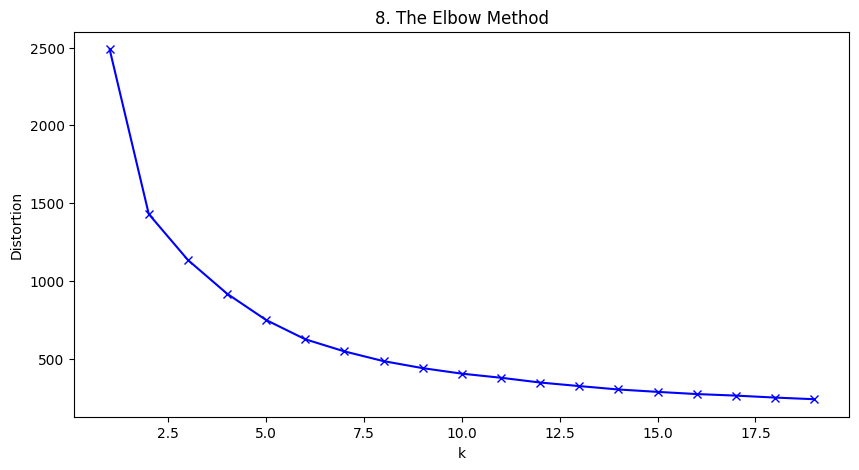

In [36]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('8. The Elbow Method')
plt.show()

# Distribusi cluster di seluruh kota

Hasil pengelompokan K-means di seluruh kota ditunjukkan pada Gambar 8. Tampaknya k=4 adalah jumlah klaster yang baik. Dan cluster 3 (biru), 0 (hijau) dan 1 (merah) memiliki batas yang jelas satu sama lain. Kota-kota di cluster 2 (ungu) tersebar luas di Amerika Serikat.

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

df_flat['Cluster'] = (kmeans.labels_).astype(str)
df_cluster = pd.merge(df_flat[['AirportCode','Cluster']], weather.drop(['Cold','Hail'], axis=1), 
                      how='inner', on='AirportCode')
df_cluster.tail(3)

,AirportCode,Cluster,Fog,Precipitation,Rain,Snow,Storm,City,State,LocationLat,LocationLng
283,KVLL,3,0.689973,0.000000,3.779585,2.105261,0.000000,Troy,MI,42.5429,-83.1779
284,KWST,0,3.740107,0.038718,6.835141,0.768170,0.000951,Westerly,RI,41.3509,-71.8054
285,KWVI,1,3.918379,0.003853,3.531298,0.000000,0.000000,Freedom,CA,36.9394,-121.7900


In [38]:
fig_cluster = px.scatter_geo(df_cluster, lat='LocationLat', lon='LocationLng',
                      hover_name=weather['City'] + ', ' + weather['State'],
                      scope="usa",
                      color_discrete_sequence =['#AB63FA', '#EF553B', '#00CC96','#636EFA'],
                      color = 'Cluster',
                      title ='8. Distribusi kluster cuaca di seluruh kota')
#fig_cluster.update_layout(height=750, width=1000)
fig_cluster.show()

# Distribusi cluster di seluruh negara bagian

Untuk lebih memvisualisasikan distribusi setiap cluster di setiap negara bagian, cluster dikelompokkan sebagai negara bagian dan lokasi dihitung sebagai rata-rata garis lintang dan garis bujur setiap kota di cluster tersebut. Distribusi klaster di seluruh negara bagian ditunjukkan pada Gambar 9. Hampir semua negara bagian memiliki tipe klaster campuran.

In [39]:
df_cluster2 = df_cluster.groupby(['State','Cluster']).agg({'Cluster':['count']}).reset_index()
df_cluster2.columns=pd.MultiIndex.from_tuples((("State", " "),("Cluster", " "),("Count", " ")))
df_cluster2.columns = df_cluster2.columns.get_level_values(0)
#df_cluster2.tail(3) #state with each cluster counts

df_loc = df_cluster[['State','Cluster','LocationLat', 'LocationLng']]
df_loc1 = df_loc.groupby(['State','Cluster']).agg({'LocationLat':'mean'}).reset_index()
df_loc2 = df_loc.groupby(['State','Cluster']).agg({'LocationLng':'mean'}).reset_index()
df_loc3 = pd.merge(df_loc1,df_loc2, how='inner', on=['State','Cluster'])
#df_loc3.tail(3) #state with cluster and location

df_clusterS = pd.merge(df_loc3,df_cluster2, how='inner', on=['State','Cluster'])
df_clusterS.tail(3) #state with each cluster count location

,State,Cluster,LocationLat,LocationLng,Count
90,WV,1,39.6182,-78.75980,1
91,WY,2,41.1556,-104.46915,2
92,WY,3,43.3776,-109.07380,3


In [40]:
fig_clusterS = px.scatter_geo(df_clusterS, lat='LocationLat', lon='LocationLng', 
                     color='Cluster',
                     size='Count',
                     color_discrete_sequence=['#636EFA', '#AB63FA', '#EF553B','#00CC96'],
                     hover_name='State',
                     scope="usa",
                     title = '9. Distribusi cluster cuaca di seluruh negara bagian')
#fig_clusterS.update_layout(height=750, width=1000)
fig_clusterS.show()

# Properti dari masing-masing cluster

Sifat masing-masing klaster dirangkum dalam Gambar 10. Dibandingkan dengan klaster lainnya, klaster 0 (biru) memiliki peluang hujan tertinggi, klaster 3 (ungu) memiliki peluang salju tertinggi, klaster 2 (hijau) memiliki peluang terendah disetiap cuaca

In [41]:
prop = df_cluster[['Cluster', 'Fog',
                   'Precipitation','Rain', 'Snow', 'Storm']].groupby(['Cluster']).mean().reset_index()
prop2 = prop.transpose().reset_index()
prop2 = prop2[(prop2['index'] !='Cluster')].sort_values(by=0)
prop2

,index,0,1,2,3
5,Storm,0.007927,0.008827,0.066659,0.104392
2,Precipitation,0.070026,0.108738,0.06634,0.03232
4,Snow,1.65494,0.449068,0.573683,3.306319
1,Fog,2.153665,2.028426,1.156406,2.006217
3,Rain,6.937246,4.510726,1.240706,2.844549


In [42]:
#from plotly.subplots import make_subplots
fig_prop=make_subplots(rows=1, cols=4, shared_yaxes=True,horizontal_spacing=0)

fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[0], name='Cluster 0'), row=1, col=1)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[1], name='Cluster 1'), row=1, col=2)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[2], name='Cluster 2'), row=1, col=3)
fig_prop.add_trace(go.Bar(x=prop2['index'], y=prop2[3], name='Cluster 3'), row=1, col=4)

fig_prop.update_yaxes(title_text="duration%/year", row=1, col=1)
fig_prop.update_layout(title_text="10. Distribusi cuaca di setiap cluster")
#fig_prop.update_layout(height=550, width=1000)
fig_prop.show()